# Dealing with Outliers
Outliers are extreme values that fall a long way outside of the other observations.
They may indicate a variability in a measurement, experimental errors or a novelty.

In [1]:
#Importing important libraries for data reading and plotting

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("bigmart.csv")

In [3]:
#Checking first five rows of the dataset

data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Univariate Outliers

A univariate outlier is a data point that consists of an extreme value on one variable.

### Let's understand Boxplot!!! 

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell you about your outliers and what their values are.

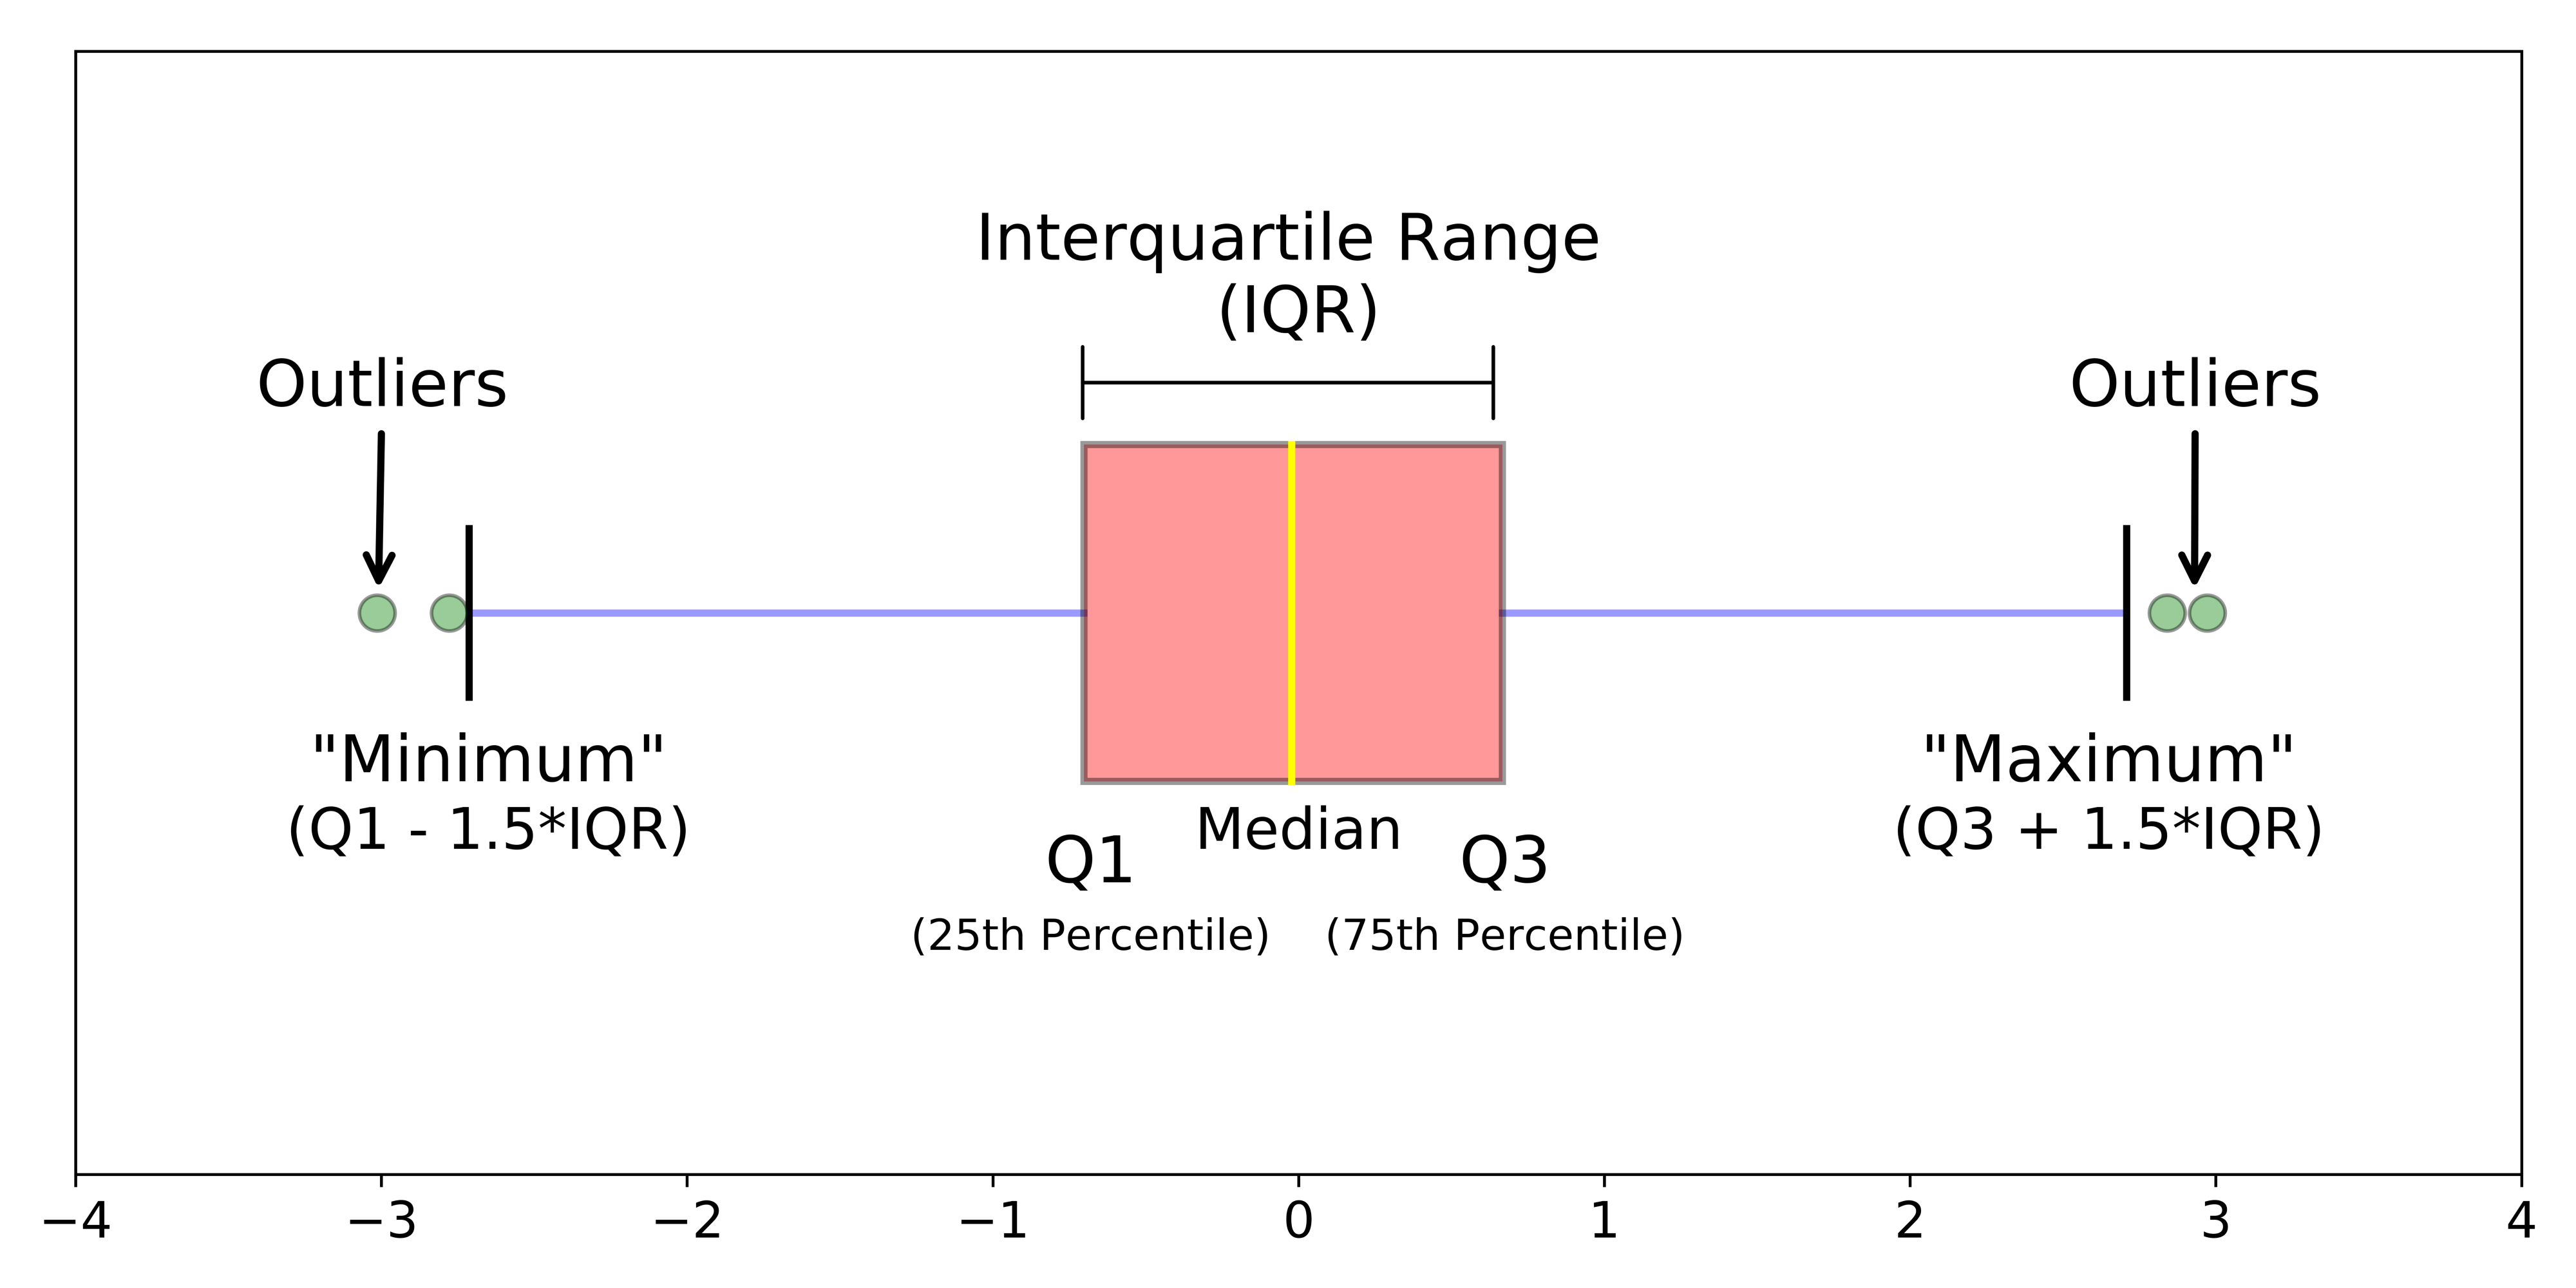


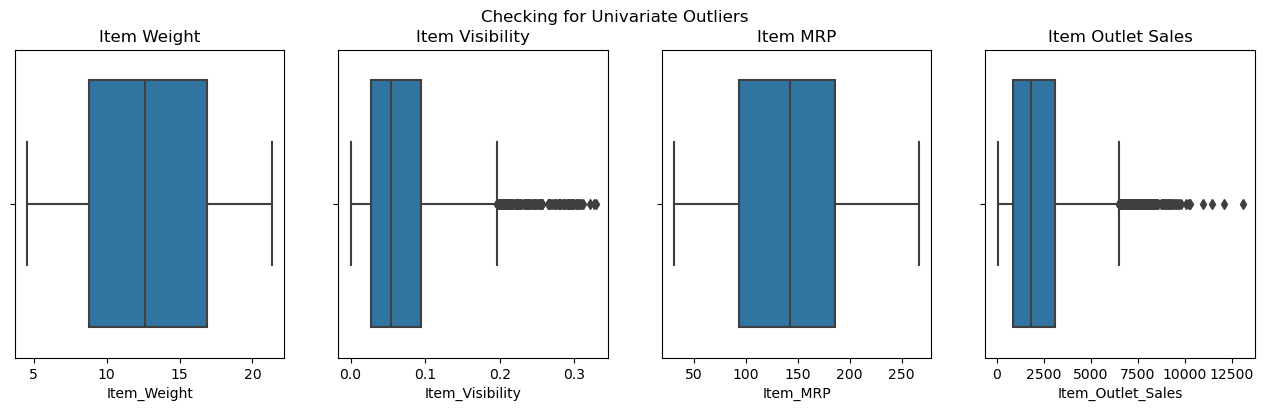

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (16, 4)

plt.subplot(1, 4, 1)
sns.boxplot(x=data['Item_Weight'])
plt.title("Item Weight")

plt.subplot(1, 4, 2)
sns.boxplot(x=data['Item_Visibility'])
plt.title("Item Visibility")

plt.subplot(1, 4, 3)
sns.boxplot(x=data['Item_MRP'])
plt.title("Item MRP")

plt.subplot(1, 4, 4)
sns.boxplot(x=data['Item_Outlet_Sales'])
plt.title("Item Outlet Sales")

plt.suptitle("Checking for Univariate Outliers")
plt.show()

## Bivariate Outliers

 A multivariate outlier is a combination of unusual values on two variables.

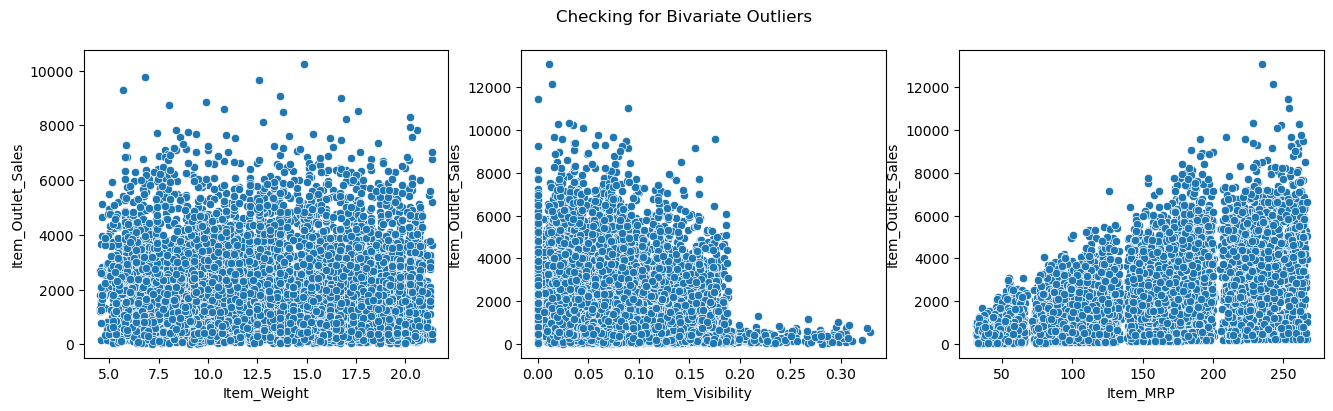

In [5]:
#Checking for Bivariate outliers using Scatterplot

plt.subplot(1,3,1)
sns.scatterplot(y=data['Item_Outlet_Sales'],x=data['Item_Weight'])

plt.subplot(1,3,2)
sns.scatterplot(y=data['Item_Outlet_Sales'],x=data['Item_Visibility'])

plt.subplot(1,3,3)
sns.scatterplot(y=data['Item_Outlet_Sales'],x=data['Item_MRP'])

plt.suptitle("Checking for Bivariate Outliers")
plt.show()

# Different Ways of dealing with outliers

1)  Winsorization - Winsorization is a way to minimize the influence of outliers in our data by either

    First, Deleting the extreme observations of our data 
     Second, Changing the value so that it is close to other values in the set.
    
2) Deleting the outliers.

3) Capping Outliers.

## Capping outliers

Capping refers to replacing the outliers to a near value so that we can keep the point in our analysis and it also does not skew the data.

In [6]:
data['Item_Outlet_Sales'].max()

13086.9648

In [7]:
#Capping the outliers in the column Item_Outlet_Sales having values greater than 10000

data['Item_Outlet_Sales'].values[data['Item_Outlet_Sales'].values>10000]=10000

In [8]:
data['Item_Outlet_Sales'].max()

10000.0

In [9]:
#Checking if there is still any value greater than 10000 left in the Item_Outlet_Sales column
data[data['Item_Outlet_Sales']>10000]
data['Item_Outlet_Sales']

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [12]:
#Dealing with the bivariate outliers
#we delete all the values which are greater than 8000 
data = data[data['Item_Outlet_Sales'] <= 8000]

In [13]:
data['Item_Outlet_Sales'].max()

7968.2944